### 국소 표현 (Local representation) 방법
- 해당 단어 그 자체만 보고, 특정 값을 맵핑하여 단어를 표현하는 방법
- 단어의 의미, 뉘앙스를 표현할 수 없음
- ex ) one-hot vector, N-gram, (count기반)Bag of Word, TDM, TF-IDF

### 연속 표현 (Continuous representation) 방법
- 단어를 표현하고자 주변을 참고하여 단어를 표현하는 방법
- 단어의 뉘앙스를 표현할 수 있음
- (예측기반) Word2Vec, FastText, (카운트기반) LSA, (예측, 카운트기반) Glove


### Bag-of-Words (BOW)
- 단어들의 가방
  - 텍스트에서 사용된 단어 종류와 빈도만을 바탕으로 분석
  - 전체 문장 구조를 보지 않고 사용된 단어만 봐도 대략적인 의미 파악 가능
- 장점
  - 전처리가 단순
  - 단어들의 빈도를 간단히 수치화할 수 있고, 통계 방법 적용이 가능
  - 분석 결과의 해석이 용이
- 단점
  - 문장 구조를 무시함에 따라 어순 상 차이 파악 불가능
  - 동음이의어의 구분이 어려우

### BoW 만들기
1. 각 단어에 고유한 인덱스 부여
2. 각 인덱스의 위치에 단어 토큰의 등장 횟수(빈도)를 기록한 벡터 생성

In [1]:
from konlpy.tag import Okt
import re
okt = Okt()

In [2]:
token = re.sub("(\.)","","정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다.")
#온점 제거하는 정제 작업

In [3]:
token

'정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다'

In [4]:
token = okt.morphs(token)

In [5]:
word2index={}
bow=[]
for voca in token :
    if voca not in word2index.keys() :
        word2index[voca]=len(word2index)
        bow.insert(len(word2index)-1, 1)
    else :
        index = word2index.get(voca)
        bow[index] = bow[index]+1

In [6]:
word2index

{'정부': 0,
 '가': 1,
 '발표': 2,
 '하는': 3,
 '물가상승률': 4,
 '과': 5,
 '소비자': 6,
 '느끼는': 7,
 '은': 8,
 '다르다': 9}

In [7]:
bow

[1, 2, 1, 1, 2, 1, 1, 1, 1, 1]

#### 사이킷런 CountVectorizer 클래스 사용해서 BoW만들기
- CountVectorizer는 띄어쓰기를 기준으로 단어를 자르는 토큰화를 진행하고 BoW를 만듦
- 한국어에 적용하면 조사 등 이유로 제대로 BoW가 만들어지지 않음
- 기본적으로 길이가 2이상인 문자에 대해서만 토큰화를 진행

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = ['you know I want your love. because I love you.']
vector = CountVectorizer()
print(vector.fit_transform(corpus).toarray()) # 코퍼스로부터 각 단어 빈도 수를 기록
print(vector.vocabulary_)

[[1 1 2 1 2 1]]
{'you': 4, 'know': 1, 'want': 3, 'your': 5, 'love': 2, 'because': 0}


#### (1) 사용자가 직접 정의한 불용어 사용

In [9]:

text = ["Family is not an important thing. It's everything."]

vect = CountVectorizer(stop_words=["the", "a", "an", "is", "not"])
print(vect.fit_transform(text).toarray())
print(vect.vocabulary_)

[[1 1 1 1 1]]
{'family': 1, 'important': 2, 'thing': 4, 'it': 3, 'everything': 0}


#### (2) CounterVectorizer에서 제공하는 자체 불용어 사용

In [10]:
text = ["Family is not an important thing. It's everything."]

vect = CountVectorizer(stop_words="english")
print(vect.fit_transform(text).toarray())
print(vect.vocabulary_)

[[1 1 1]]
{'family': 0, 'important': 1, 'thing': 2}


#### (3) NLTK에서 지원하는 불용어 사용

In [11]:
text = ["Family is not an important thing. It's everything."]
from nltk.corpus import stopwords
sw = stopwords.words("english")
vect = CountVectorizer(stop_words=sw)
print(vect.fit_transform(text).toarray())
print(vect.vocabulary_)

[[1 1 1 1]]
{'family': 1, 'important': 2, 'thing': 3, 'everything': 0}


## Term-Document-Matrix (TDM)

- 단어문서행렬(TDM)
  - 문서별로 나타난 단어의 빈도를 표 형태로 나타낸 것
  - 자연어 텍스트를 정형 데이터와 같은 방식으로 처리
  - 각 문서에 대한 BoW를 하나의 행렬로 만든 것으로 생각할 수 있음

- 단어 문서 행렬(TDM)의 한계
  - 희소 행렬(Sparse Matrix)
    - 문서 군내에서 사용되는 단어의 수가 많지만, 하나의 문장이나 문서에서 사용되는 단어의 수가 제한적임에 따라 대부분의 칸이 0값
    - 사례 수에 비해 변수의 수가 많아 분석이 어려움
  - 단순 빈도 수 기반 접근
    - 중요한 단어와 불필요한 단어들이 혼재되어 있음
    - 여러 문서에 사용되는 모든 단어에 대해 빈도 표기를 하기 때문에, 불용어의 빈도가 동일하게 높을 수 있으며, 그 결과로 문서들이 유사하다고 판단할 수 없음.
    - ex) 영어의 the는 불용어로 어떤 문서든 자주 등장하지만 문서1, 문서2, 문서3에서 동일하게 the의 빈도수가 높다고 이 문서들이 유사하다고 판단해서는 안됨 --> TF-IDF

TDM 구축

https://www.data.go.kr/dataset/15012945/fileData.do
더보기 4에 폭염 관련 정보 # 1번 파일 340행 지우고 실행

In [12]:
import pandas as pd
df = pd.read_csv('폭염.csv',  quotechar='"', error_bad_lines = False, encoding='cp949',usecols=range(0,18))

In [13]:
df.shape

(29982, 18)

In [14]:
df.columns

Index(['주소', '일자', '언론사', '기고자', '제목', '통합 분류1', '통합 분류2', '통합 분류3',
       '사건/사고 분류1', '사건/사고 분류2', '사건/사고 분류3', '개체명(인물)', '개체명(지역)',
       '개체명(기업/기관)', '키워드', '특성추출', '본문', '원본주소'],
      dtype='object')

In [15]:
df['본문'].head()

0    독일의 어느 시인은 ‘경이롭게 아름다운 5월에’라고 노래했지만,우리에게는 5월의 경...
1    水原 32도까지…11일께 한풀 꺾일 듯나흘째 초여름 무더위가 계속되고 있다.이번 더...
2    ◎어제하오 2∼3시사이연일 계속되는 무더위로 전력소비가 급증,시간당 최대전력사용량이...
3    군당국은 11일 행군훈련중이던 방위병 3명이 열사병으로 숨진것은 혹서기안전관리규정을...
4    민주화는 궁극엔 인간화와 통한다. 사람이 사람대접을 받으며 사람답게 살자는 것이다....
Name: 본문, dtype: object

In [16]:
df2 = pd.read_csv('폭염 (2).csv',  quotechar='"', error_bad_lines = False, encoding='utf-8') #주신 파일

b'Skipping line 15: expected 18 fields, saw 19\nSkipping line 71: expected 18 fields, saw 19\nSkipping line 74: expected 18 fields, saw 19\nSkipping line 79: expected 18 fields, saw 19\nSkipping line 94: expected 18 fields, saw 19\nSkipping line 110: expected 18 fields, saw 19\nSkipping line 118: expected 18 fields, saw 19\nSkipping line 120: expected 18 fields, saw 19\nSkipping line 130: expected 18 fields, saw 19\nSkipping line 137: expected 18 fields, saw 19\nSkipping line 159: expected 18 fields, saw 19\nSkipping line 168: expected 18 fields, saw 19\nSkipping line 174: expected 18 fields, saw 19\nSkipping line 190: expected 18 fields, saw 20\nSkipping line 194: expected 18 fields, saw 19\nSkipping line 210: expected 18 fields, saw 21\nSkipping line 214: expected 18 fields, saw 20\nSkipping line 222: expected 18 fields, saw 19\nSkipping line 237: expected 18 fields, saw 19\nSkipping line 245: expected 18 fields, saw 20\nSkipping line 260: expected 18 fields, saw 19\nSkipping line 26

In [17]:
df2.columns

Index(['주소', '일자', '언론사', '기고자', '제목', '통합 분류1', '통합 분류2', '통합 분류3',
       '사건/사고 분류1', '사건/사고 분류2', '사건/사고 분류3', '개체명(인물)', '개체명(지역)',
       '개체명(기업/기관)', '키워드', '특성추출', '본문', '원본주소'],
      dtype='object')

In [18]:
df2['본문'].head()

0    23일 경북 경산 39.9도까지 치솟아 1942년 8월1일 대구 40.0도 기..열...
1    롭스, 네일·염모제 매출 각각 52%·31% ↑ “아무리 더워도 아름다움 양보 못해...
2    중국의 창성바이오가 가짜백신으로 상장폐지 위기. 국내 제약바이오주들도 덩달아 급락....
3    중국의 창성바이오가 가짜백신으로 상장폐지 위기. 국내 제약바이오주들도 덩달아 급락....
4    OECD 주요국과 역행.. 탈원전이 상황 악화시켜       지난해 우리나라 이산화...
Name: 본문, dtype: object

#### Okt 분석기 활용 예제

#### from konlpy.tag import Komoran

In [20]:
from konlpy.tag import Komoran

In [21]:
tagger = Komoran()

In [22]:
tagger.nouns('아침에 해를 보며 버스를 탔다')

['아침', '해', '버스']

In [23]:
import re

In [24]:
def get_nouns(text) :
    nouns = tagger.nouns(text)
    nouns = [word for word in nouns if len(word)>1]
    nouns == [word for word in nouns if not re.match(r'\d+', word)]
    return nouns

In [25]:
get_nouns('아침에 해를 보며 버스를 탔다.')

['아침', '버스']

#### 폭염 관련 메타데이터 TDM 구축

In [26]:
#tokenizer : 토큰을 만들 때 적용하고 싶은 함수 지정
cv = CountVectorizer(max_features=1000, tokenizer = get_nouns) # 모델 구축
tdm = cv.fit_transform(df2['본문']) # 데이터 지정-> fit --> TDM 생성
cv.get_feature_names()[:10] # 첫 10단어 가져오기

['.co', '.com', '.kr', '1994년', '2시', '35', '40', '6월', '7월', '8월']

In [27]:
df = df.drop(df.loc[df['본문'].isna()].index) # df['본문']이 NaN인 값 제외시켜주기

In [28]:
#cf.
cv2 = CountVectorizer(max_features=1000, tokenizer = get_nouns)
tdm2 = cv2.fit_transform(df['본문'])
cv2.get_feature_names()[:10] # 첫 10단어

['.co', '.com', '.kr', '10년', '10월', '25', '2시', '30', '32', '33']

#### TDM 저장

In [29]:
from sklearn.externals import joblib
with open('hot_news.pkl', 'wb') as f:
    joblib.dump({'vectorizer' : cv, 'tdm' : tdm}, f)

In [30]:
with open('hot_news.pkl','rb') as f:
    data = joblib.load(f)

#### 단어 빈도표 만들기

In [31]:
count = tdm.sum(axis=0) # 열방향 사용 단어들의 합

In [32]:
word_count = pd.DataFrame({'단어' : cv.get_feature_names(), '빈도' : count.flat})

C:\ProgramData\Anaconda3\envs\insun\lib\site-packages\pandas\core\dtypes\dtypes.py:458: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if string == 'category':


In [33]:
word_count.sort_values('빈도', ascending=False)

,단어,빈도
922,폭염,10678
931,피해,1341
823,지역,1225
167,기자,1165
71,계속,1077
165,기온,980
570,연일,950
438,서울,932
820,지속,845
156,기록,831


In [34]:
#tdm으로 된 행렬 확인하기 -> 첫번째 기사에 대한 행렬
doc = tdm[0].toarray()
doc

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [35]:
#cf
count2 = tdm2.sum(axis=0) # 열방향 사용 단어들의 합
word_count2 = pd.DataFrame({'단어' : cv2.get_feature_names(), '빈도' : count2.flat})
word_count2.sort_values('빈도', ascending=False)

C:\ProgramData\Anaconda3\envs\insun\lib\site-packages\pandas\core\dtypes\dtypes.py:458: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if string == 'category':


,단어,빈도
911,폭염,46234
811,지역,9154
179,기온,8269
807,지방,6641
780,주의보,6566
85,계속,6306
553,여름,5363
721,전국,5349
307,무더위,5340
255,더위,5154


### TF-IDF
ex) 문서1 : 먹고 싶은 사과/ 문서2 : 먹고 싶은 바나나 / 문서3 : 길고 노란 바나나 바나나 / 문서4 : 저는 과일이 좋아요
- TF : 문서 내에 바나나 단어 빈도
- IDF : 전체 문서 중 바나나 단어 포함하는 문서 빈도의 역수
  - 문서 2의 TF * log(IDF) = 1 * log(4-문서 개수 / (2+1(+1 : 분모 0 방지)))

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = ['you know I want your love','I like you', 'What should I do']
tfidfv = TfidfVectorizer().fit(corpus)
print(tfidfv.transform(corpus).toarray())
print(tfidfv.vocabulary_)

[[0.         0.46735098 0.         0.46735098 0.         0.46735098
  0.         0.35543247 0.46735098]
 [0.         0.         0.79596054 0.         0.         0.
  0.         0.60534851 0.        ]
 [0.57735027 0.         0.         0.         0.57735027 0.
  0.57735027 0.         0.        ]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


### 연습
- 아마존 휴대폰에 대한 고객 리뷰 데이터를 이용하여 TDM을 만들어보자

In [37]:
from urllib.request import urlretrieve
urlretrieve('http://doc.mindscale.kr/km/unstructured/review.gz', 'review.gz')


('review.gz', <http.client.HTTPMessage at 0x21f0f64ad30>)

In [38]:
data1=pd.read_csv('./review/review')

In [39]:
data1.head()

,reviewText,overall
0,They look good and stick good! I just don't li...,4
1,These stickers work like the review says they ...,5
2,These are awesome and make my phone look so st...,5
3,Item arrived in great time and was in perfect ...,4
4,"awesome! stays on, and looks great. can be use...",5


In [40]:
data1.shape

(194439, 2)

In [41]:
data1['reviewText'].isna().sum()

99

In [42]:
data1=data1.drop(data1[data1['reviewText'].isna()].index)

In [43]:
data1.shape

(194340, 2)

In [44]:
from nltk.tokenize import word_tokenize

In [45]:
word_tokenize?

In [46]:
cv2=CountVectorizer(max_features=1500, stop_words = 'english')
tdm2 = cv2.fit_transform(data1['reviewText'])

In [47]:
doc=tdm2[3].toarray()
doc

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [48]:
cv2.get_feature_names()

['00',
 '10',
 '100',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '1a',
 '20',
 '2013',
 '24',
 '25',
 '2a',
 '2nd',
 '30',
 '34',
 '3g',
 '3gs',
 '3rd',
 '40',
 '4g',
 '4s',
 '50',
 '5c',
 '5mm',
 '5s',
 '5v',
 '60',
 '75',
 '80',
 '8217',
 '90',
 '99',
 'ability',
 'able',
 'absolutely',
 'ac',
 'access',
 'accessible',
 'accessories',
 'accessory',
 'accidentally',
 'accurate',
 'active',
 'actual',
 'actually',
 'adapter',
 'adapters',
 'add',
 'added',
 'adding',
 'addition',
 'additional',
 'adds',
 'adequate',
 'adhesive',
 'adjust',
 'adjustable',
 'advertised',
 'affordable',
 'ago',
 'air',
 'allow',
 'allowing',
 'allows',
 'alot',
 'aluminum',
 'amazing',
 'amazon',
 'amp',
 'amps',
 'android',
 'angle',
 'anker',
 'annoying',
 'answer',
 'antenna',
 'anti',
 'anymore',
 'apart',
 'app',
 'appear',
 'appearance',
 'appears',
 'apple',
 'application',
 'applications',
 'applied',
 'apply',
 'applying',
 'apps',
 'area',
 'areas',
 'aren',
 'arm',
 'armband',
 'armor',
 'arms'

In [49]:
count2 = tdm2.sum(axis=0) # 열방향 사용 단어들의 합

In [50]:
word_count2 = pd.DataFrame({'단어' : cv2.get_feature_names(), '빈도' : count2.flat})

C:\ProgramData\Anaconda3\envs\insun\lib\site-packages\pandas\core\dtypes\dtypes.py:458: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if string == 'category':


In [51]:
word_count2.sort_values('빈도', ascending=False)

,단어,빈도
941,phone,181717
200,case,150035
730,like,74073
552,great,68898
1402,use,63229
1131,screen,62373
684,just,61980
547,good,60355
134,battery,59361
670,iphone,49758


In [52]:
word_count2.sort_values('빈도', ascending=False).iloc[:500]

,단어,빈도
941,phone,181717
200,case,150035
730,like,74073
552,great,68898
1402,use,63229
1131,screen,62373
684,just,61980
547,good,60355
134,battery,59361
670,iphone,49758


In [57]:
dict(word_count2.sort_values('빈도', ascending=False).iloc[:500].values)

{'phone': 181717,
 'case': 150035,
 'like': 74073,
 'great': 68898,
 'use': 63229,
 'screen': 62373,
 'just': 61980,
 'good': 60355,
 'battery': 59361,
 'iphone': 49758,
 'charge': 46277,
 'charger': 40146,
 'product': 39664,
 'really': 38749,
 'time': 37964,
 'works': 33669,
 'does': 33617,
 'don': 32496,
 'nice': 30353,
 'little': 30291,
 'price': 30192,
 'love': 29773,
 'usb': 29523,
 'quality': 29260,
 'charging': 29122,
 'work': 28979,
 'fit': 28412,
 'easy': 27876,
 've': 27333,
 'device': 27207,
 'used': 25647,
 'protector': 25596,
 'power': 25160,
 'using': 24870,
 'got': 24118,
 'better': 24056,
 'bought': 23622,
 'cable': 21931,
 'recommend': 21528,
 'need': 21372,
 'fits': 21295,
 'doesn': 20980,
 'cover': 20149,
 'looks': 19616,
 'buy': 19541,
 'did': 19492,
 'car': 19262,
 'protection': 19025,
 'new': 18643,
 'cases': 18535,
 'way': 18516,
 'sound': 18418,
 'galaxy': 17535,
 'thing': 17282,
 'hard': 17250,
 'bluetooth': 17248,
 'want': 16988,
 'make': 16985,
 '34': 16953,


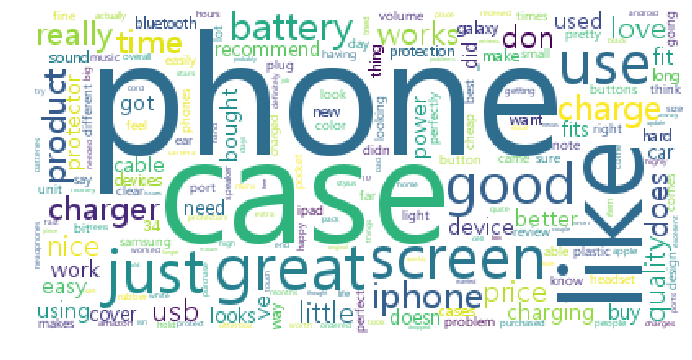

In [60]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

wordcloud = WordCloud(font_path = 'c:/Windows/Fonts/malgun.ttf', background_color = 'white').generate_from_frequencies(dict(word_count2.sort_values('빈도', ascending=False).iloc[:500].values))
plt.figure(figsize=(12,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()